### LSE Data Analytics Online Career Accelerator

# DA201: Data Analytics using Python

# Scenario

You work as a data analyst at a health insurance company. Analysing worldwide COVID-19 data remains pertinent even today, as it provides valuable insights into the ongoing global impact of the pandemic, identifies emerging trends and variants, and can help to inform evidence-based decision-making. To provide up-to-date information for executives, the claims department, and clients, you are tasked with gathering the latest data on worldwide COVID-19 cases. Each department requires different information. For each country on the list:

- The executives need to know the total cases and the number of deaths.
- Claims need to know the number of new cases, new deaths, active cases, and serious/critical cases.
- Clients need to know the number of total cases and total recoveries.

# Objective 
For each country on the list, find:

- the total cases and the number of deaths
- the number of new cases, new deaths, active cases, and serious/critical cases
- the number of total cases and total recoveries.


## 1. Import the libraries

In [1]:
# Import the necessary packages.
import requests
import pandas as pd
from bs4 import BeautifulSoup

## 2. Establish connection with URL

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   COVID - Coronavirus Statistics - Worldometer
  </title>
  <meta content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates." name="description"/>
  <!-- Favicon -->
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
  <link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
  <link href="/favicon/apple-icon-76x
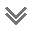

In [2]:
# Create a url variable.
url = 'https://www.worldometers.info/coronavirus/'

# Create a requests variable.
r = requests.get(url)

# Make contact with the website.
if r.status_code == 200:
    html_doc = r.text
    
# Get a BeautifulSoup object.
soup = BeautifulSoup(html_doc)

# Print the output.
print(soup.prettify())

## 3. Extract tabular data

In [3]:
# Extract the contents of the table with the table id. 
table = soup.find('table', attrs={'id': 'main_table_countries_today'})

# View the table.
table

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

## 4. Extract table headers

In [4]:
# Specify BeautifulSoup to go through the table and find everything 
# with a tr tag.
# Note: th = (table header), tr = (table row), and td = table column
rows = table.find_all('tr', attrs={'style': ""})

# View the result.
rows

[<tr>
 <th width="1%">#</th>
 <th width="100">Country,<br/>Other</th>
 <th width="20">Total<br/>Cases</th>
 <th width="30">New<br/>Cases</th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">New<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th width="30">Population</th>
 <th style="display:none" width="30">Continent</th>
 <th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
 <th width="30">New Cases/1M pop</th>
 <th width="30">New Deaths/1M pop</th>
 <th width="30">Active Cases/1M pop</th>
 </tr>,
 <tr class="total_row_world">
 <td></td>
 <td style="text-align:left;">World</td>
 <td>692,196,337</td>
 <td

In [5]:
# Store the extracted data.
output = []

column_names = ['Country,Other', 'Total Cases', 'New Cases', 'Total Deaths',
               'New Deaths', 'Total Recovered', 'New Recovered',
               'Active Cases', 'Serious, Critical', 'Tot Cases/ 1M pop',
               'Deaths/ 1M pop', 'Total Tests', 'Tests/ 1M pop', 'Population']

# Create a for loop statement.
for cases in rows:
    cases_data = cases.find_all("td")
    if cases_data:
        # Extract the text within each element.
        cases_text = [td.text for td in cases_data]
        output.append(dict(zip(column_names, cases_text)))
        
# Create an output.
output

[{'Country,Other': '',
  'Total Cases': 'World',
  'New Cases': '692,196,337',
  'Total Deaths': '+269',
  'New Deaths': '6,903,305',
  'Total Recovered': '+12',
  'New Recovered': '664,486,875',
  'Active Cases': '+32,066',
  'Serious, Critical': '20,806,157',
  'Tot Cases/ 1M pop': '37,118',
  'Deaths/ 1M pop': '88,802',
  'Total Tests': '885.6',
  'Tests/ 1M pop': '',
  'Population': ''},
 {'Country,Other': '1',
  'Total Cases': 'USA',
  'New Cases': '107,508,405',
  'Total Deaths': '',
  'New Deaths': '1,169,785                                ',
  'Total Recovered': '',
  'New Recovered': '105,632,230',
  'Active Cases': '',
  'Serious, Critical': '706,390',
  'Tot Cases/ 1M pop': '695',
  'Deaths/ 1M pop': '321,107',
  'Total Tests': '3,494',
  'Tests/ 1M pop': '1,181,089,416',
  'Population': '3,527,691'},
 {'Country,Other': '2',
  'Total Cases': 'India',
  'New Cases': '44,995,486',
  'Total Deaths': '',
  'New Deaths': '531,915                                ',
  'Total Recover

## 5. Convert extracted data into a Panda DataFrame

In [6]:
# Create a DataFrame directly from the output.
data = pd.DataFrame(output)

# View the DataFrame.
data.head()

,"Country,Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population
0,,World,"692,196,337",+269,"6,903,305",+12,"664,486,875","+32,066","20,806,157","37,118","88,802",885.6,,
1,1,USA,"107,508,405",,"1,169,785",,"105,632,230",,"706,390",695,"321,107","3,494","1,181,089,416","3,527,691"
2,2,India,"44,995,486",,"531,915",,"44,462,116",,"1,455",N/A,"31,988",378,"930,797,975","661,721"
3,4,Germany,"38,428,685",,"174,352",,"38,240,600",,"13,733",N/A,"458,119","2,078","122,332,384","1,458,359"
4,5,Brazil,"37,717,062",,"704,659",,"36,249,161",,"763,242",N/A,"175,140","3,272","63,776,166","296,146"
